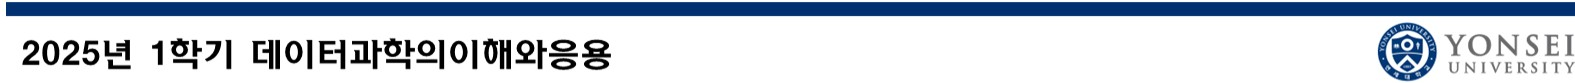

### Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Îäî ÏÉùÌôú ÏäµÍ¥ÄÏóê Îî∞Î•∏ ÌñâÎ≥µÎèÑ Ï°∞ÏÇ¨Î•º ÏúÑÌï¥ Ï∞∏Ïó¨Ìïú Ï∞∏Í∞ÄÏûêÎì§Ïùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÎßåÏ°±ÎèÑÎ•º Í∏∞Î°ùÌïú Í≤ÉÏûÖÎãàÎã§. 'train.csv'Î•º Ïù¥Ïö©ÌïòÏó¨ Î∂ÑÎ•òÎ™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† 'test.csv'Î•º Î∂ÑÎ•òÎ™®Îç∏Ïóê ÏûÖÎ†•ÌïòÏó¨ ÎßåÏ°±ÎèÑÎ•º ÏòàÏ∏°ÌïòÏÑ∏Ïöî


|column|description|
|-|-|
|id|Ï∞∏Í∞ÄÏûê Î≤àÌò∏|
|age|ÎÇòÏù¥|
|gender|ÏÑ±Î≥Ñ(ÎÇ®:M, Ïó¨:F)|
|smartphone_usage|Ï£ºÎãπ ÌèâÍ∑† Ïª§ÎÆ§ÎÑàÌã∞, Ïú†ÌäúÎ∏å, SNS Ïù¥Ïö©ÏãúÍ∞Ñ|
|sleeping_hour|ÌèâÍ∑† ÏàòÎ©¥ ÏãúÍ∞Ñ|
|status_text|ÌòÑÏû¨ ÏûêÏã†Ïùò Í∞êÏ†ïÏÉÅÌÉúÎ•º ÌëúÌòÑÌïú ÌÖçÏä§Ìä∏|
|satisfaction|ÎßåÏ°±ÎèÑ(0:Î∂àÎßåÏ°±, 1:Î≥¥ÌÜµ, 2:ÎßåÏ°±)|

In [1]:
if __name__ == "__main__" and 'executed' not in globals():
    import warnings
    warnings.filterwarnings('ignore')
    from urllib.request import urlretrieve
    base_url = "https://swclass.yonsei.ac.kr:2020/dev/web/1104/"
    urlretrieve(base_url + "15_train.csv", "train.csv") # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌååÏùº
    urlretrieve(base_url + "15_test.csv", "test.csv")   # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌååÏùº
    urlretrieve(base_url + "15_submit_form.csv", "submit_form.csv") # Ï†úÏ∂ú ÏñëÏãù ÌååÏùº
    executed = True
else:
    print('Ïù¥ÎØ∏ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î°úÎìú ÌïòÏòÄÏúºÎØÄÎ°ú Îã§Ïãú Îã§Ïö¥Î∞õÏßÄ ÏïäÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïãú Îã§Ïö¥Î∞õÏúºÎ†§Î©¥ Îü∞ÌÉÄÏûÑ - ÏÑ∏ÏÖò Îã§Ïãú ÏãúÏûëÏùÑ ÌïòÏÑ∏Ïöî')

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Í∞Ä ÏûàÏúºÎ©¥ ÏûêÏú†Î°≠Í≤å Ï∂îÍ∞ÄÎ°ú import Ìï† Ïàò ÏûàÏäµÎãàÎã§.

df1 = pd.read_csv("train.csv", encoding='euc-kr') # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖã
df2 = pd.read_csv("test.csv", encoding='euc-kr') # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã(ÌÅ¥ÎûòÏä§Í∞íÏù¥ NaNÏúºÎ°ú ÎêòÏñ¥ÏûàÏäµÎãàÎã§)

size = df1.shape[0] # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞

df = pd.concat([df1, df2], ignore_index=True) # ÏûëÏÑ± Ìé∏ÏùòÎ•º ÏúÑÌï¥ ÌïòÎÇòÏùò dfÎ°ú Î≥ëÌï©



# **Data Preparation**
+ ÏûêÎ£åÌòï ÌôïÏù∏

In [3]:
df.dtypes

id                    int64
age                   int64
gender               object
smartphone_usage     object
sleeping_hour        object
status_text          object
satisfaction        float64
dtype: object

+ Ïù∏ÏΩîÎî©
+ Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨
+ Í∏∞ÌÉÄ ÌïÑÏöîÌïú Ï≤òÎ¶¨


Ïπ¥ÌÖåÍ≥†Î¶¨ Î™©Î°ù: ['Í∏∞ÏÅ®', 'Î¨¥Í∏∞Î†•', 'Î∂àÏïà', 'ÏÑ§Î†ò', 'Ïì∏Ïì∏Ìï®', 'Ïö∞Ïö∏', 'ÏõÉÏùå', 'ÏùºÏÉÅÏ†Å', 'Ï¶êÍ±∞ÏõÄ', 'ÌèâÎ≤î', 'ÌèâÏÜå', 'ÌèâÏò®']
Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞úÏàò : 12
Í≤∞Ï∏°Ïπò(nan)Ïùò Í∞ØÏàò : 104
train Í≤∞Ï∏°Ïπò(nan)Ïùò Í∞ØÏàò : 50
test Í≤∞Ï∏°Ïπò(nan)Ïùò Í∞ØÏàò : 54


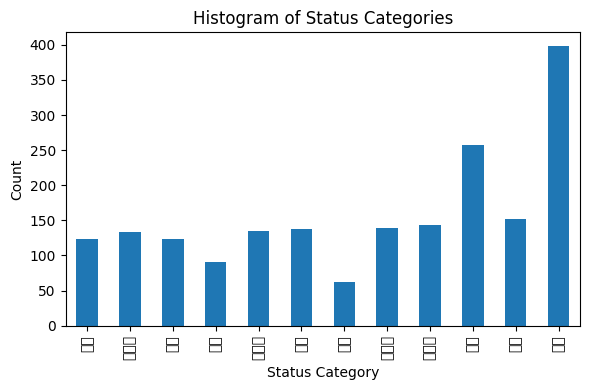

In [4]:
import matplotlib.pyplot as plt
df['status'] = df.status_text.str.extract("([Í∞Ä-Ìû£]+)~")
df['status'] = df['status'].astype('category') # Ïπ¥ÌÖåÍ≥†Î¶¨Î°ú Ï†ÑÌôò
print("\nÏπ¥ÌÖåÍ≥†Î¶¨ Î™©Î°ù:", df["status"].cat.categories.tolist())
print("Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞úÏàò :", df["status"].nunique())
print('Í≤∞Ï∏°Ïπò(nan)Ïùò Í∞ØÏàò :', df['status'].isna().sum())
print('train Í≤∞Ï∏°Ïπò(nan)Ïùò Í∞ØÏàò :', df[:size]['status'].isna().sum())
print('test Í≤∞Ï∏°Ïπò(nan)Ïùò Í∞ØÏàò :', df[size:]['status'].isna().sum())

counts = df["status"].value_counts().sort_index()
plt.figure(figsize=(6, 4))
counts.plot(kind="bar")
plt.xlabel("Status Category")
plt.ylabel("Count")
plt.title("Histogram of Status Categories")
plt.tight_layout()
plt.show()

In [5]:
df.smartphone_usage

0        Ïª§ÎÆ§ÎãàÌã∞ 16ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 15ÏãúÍ∞Ñ, SNS 8ÏãúÍ∞Ñ
1       Ïª§ÎÆ§ÎãàÌã∞ 16ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 33ÏãúÍ∞Ñ, SNS 25ÏãúÍ∞Ñ
2       Ïª§ÎÆ§ÎãàÌã∞ 29ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 10ÏãúÍ∞Ñ, SNS 26ÏãúÍ∞Ñ
3        Ïª§ÎÆ§ÎãàÌã∞ 13ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 7ÏãúÍ∞Ñ, SNS 19ÏãúÍ∞Ñ
4        Ïª§ÎÆ§ÎãàÌã∞ 21ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 8ÏãúÍ∞Ñ, SNS 30ÏãúÍ∞Ñ
                    ...              
1995     Ïª§ÎÆ§ÎãàÌã∞ 20ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 13ÏãúÍ∞Ñ, SNS 1ÏãúÍ∞Ñ
1996     Ïª§ÎÆ§ÎãàÌã∞ 2ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 22ÏãúÍ∞Ñ, SNS 13ÏãúÍ∞Ñ
1997     Ïª§ÎÆ§ÎãàÌã∞ 5ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 12ÏãúÍ∞Ñ, SNS 19ÏãúÍ∞Ñ
1998       Ïª§ÎÆ§ÎãàÌã∞ 9ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 7ÏãúÍ∞Ñ, SNS 7ÏãúÍ∞Ñ
1999    Ïª§ÎÆ§ÎãàÌã∞ 14ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 11ÏãúÍ∞Ñ, SNS 15ÏãúÍ∞Ñ
Name: smartphone_usage, Length: 2000, dtype: object

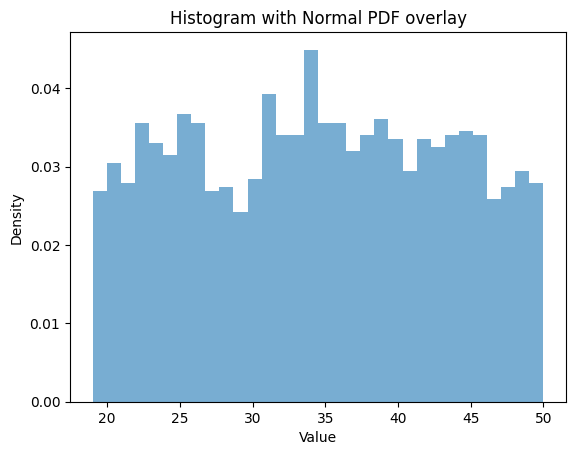

In [6]:
import matplotlib.pyplot as plt
age = df['age']
fig1, ax1 = plt.subplots()
#ax1.hist(data_norm, bins='auto', density=True, alpha=0.6)        # ÌûàÏä§ÌÜ†Í∑∏Îû® (Î∞ÄÎèÑ Ïä§ÏºÄÏùº)
ax1.hist(age, bins=(50-19+1), density=True, alpha=0.6)        # ÌûàÏä§ÌÜ†Í∑∏Îû® (Î∞ÄÎèÑ Ïä§ÏºÄÏùº)
ax1.set_xlabel("Value")
ax1.set_ylabel("Density")
ax1.set_title("Histogram with Normal PDF overlay")
plt.show()

In [7]:
# Ï∂îÍ∞Ä ÏûëÏóÖÏùÑ ÏúÑÌïú ÏÖÄ
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

df.gender = df.gender.fillna("F")

#df.status_text = df.status_text.str.extract("([Í∞Ä-Ìû£]+)~")
df['status'] = df.status_text.str.extract("([Í∞Ä-Ìû£]+)~")
df['status'] = df['status'].astype('category')

df.smartphone_usage = df.smartphone_usage.astype(str)
#df.smartphone_usage = df.smartphone_usage.str.extract("Ïª§ÎÆ§ÎãàÌã∞ ([0-9]+)ÏãúÍ∞Ñ").astype(int)+df.smartphone_usage.str.extract("Ïú†ÌäúÎ∏å ([0-9]+)ÏãúÍ∞Ñ").astype(int)+df.smartphone_usage.str.extract("SNS ([0-9]+)ÏãúÍ∞Ñ").astype(int)
df['community'] = df.smartphone_usage.str.extract("Ïª§ÎÆ§ÎãàÌã∞ ([0-9]+)ÏãúÍ∞Ñ").astype(int)
df['youtube'] = df.smartphone_usage.str.extract("Ïú†ÌäúÎ∏å ([0-9]+)ÏãúÍ∞Ñ").astype(int)
df['sns'] = df.smartphone_usage.str.extract("SNS ([0-9]+)ÏãúÍ∞Ñ").astype(int)

df["nage"] = df['age'] # ageÎäî Ïó∞ÏÜç Í∞íÏù¥ÎØÄÎ°ú, classÌôî Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÎã§.
df["ngender"] = df.gender.replace(["M" , "F"], [0,1])
#df["nsmartphone_usage"] = df['smartphone_usage']
# sleeping_hourÎäî Í∞ÄÎä•Ìïú Ìïú Ïú†ÏÇ¨Ìïú float Í∞íÏúºÎ°ú Î≥ÄÌôò
df["nsleeping_hour"] = df.sleeping_hour.map({"4ÏãúÍ∞Ñ ÎØ∏Îßå":3.5, "4ÏãúÍ∞Ñ~5ÏãúÍ∞Ñ":4.5, "5ÏãúÍ∞Ñ~6ÏãúÍ∞Ñ":5.5, "6ÏãúÍ∞Ñ~7ÏãúÍ∞Ñ":6.5, "7ÏãúÍ∞Ñ~8ÏãúÍ∞Ñ":7.5, "8ÏãúÍ∞Ñ~9ÏãúÍ∞Ñ":8.5, "9ÏãúÍ∞Ñ Ï¥àÍ≥º":9.5 })
#df["nstatus_text"] = df.status_text.map({"Í∏∞ÏÅ®":0 , "Ï¶êÍ±∞ÏõÄ":0 , "ÏÑ§Î†ò":0 , "ÏõÉÏùå":0, "ÌèâÏÜå":1,
#                                        "ÌèâÏò®":1, "ÌèâÎ≤î":1, "ÏùºÏÉÅÏ†Å":1, "Î¨¥Í∏∞Î†•":2, "Ïì∏Ïì∏Ìï®":2, "Î∂àÏïà":2, "Ïö∞Ïö∏":2})

# Í≤∞Ï∏°Í∞í Ï±ÑÏö∞Í∏∞
df_known   = df[df["status"].notna()].copy()
df_missing = df[df["status"].isna()].copy()

X_known   = df_known.drop(columns=["status"])
y_known   = df_known["status"]
X_missing = df_missing.drop(columns=["status"])


# Ï†ÑÏ≤òÎ¶¨ + Î™®Îç∏ ÌååÏù¥ÌîÑÎùºÏù∏ 
num_cols  = X_known.select_dtypes(include=["number"]).columns
cat_cols  = X_known.select_dtypes(exclude=["number"]).columns

num_cols = num_cols.drop(['id', 'satisfaction'])
cat_cols = cat_cols.drop(['gender', 'smartphone_usage', 'sleeping_hour', 'status_text'])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

#{'model__bootstrap': True, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__n_estimators': 1600}

rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    n_estimators=1600,
    random_state=42,
    class_weight="balanced"   # ÎùºÎ≤® Î∂àÍ∑†Ìòï ÏôÑÌôî
)

clf = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", rf)
])

clf.fit(X_known, y_known)

# Í≤∞Ï∏°Ìñâ ÏòàÏ∏° & Ï±ÑÏö∞Í∏∞ 
preds = clf.predict(X_missing)
df.loc[df["status"].isna(), "status"] = preds

df



id  age gender               smartphone_usage sleeping_hour  \
0        1   49      F   Ïª§ÎÆ§ÎãàÌã∞ 16ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 15ÏãúÍ∞Ñ, SNS 8ÏãúÍ∞Ñ       5ÏãúÍ∞Ñ~6ÏãúÍ∞Ñ   
1        2   46      F  Ïª§ÎÆ§ÎãàÌã∞ 16ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 33ÏãúÍ∞Ñ, SNS 25ÏãúÍ∞Ñ       4ÏãúÍ∞Ñ~5ÏãúÍ∞Ñ   
2        3   47      M  Ïª§ÎÆ§ÎãàÌã∞ 29ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 10ÏãúÍ∞Ñ, SNS 26ÏãúÍ∞Ñ       4ÏãúÍ∞Ñ~5ÏãúÍ∞Ñ   
3        4   32      M   Ïª§ÎÆ§ÎãàÌã∞ 13ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 7ÏãúÍ∞Ñ, SNS 19ÏãúÍ∞Ñ       5ÏãúÍ∞Ñ~6ÏãúÍ∞Ñ   
4        5   23      F   Ïª§ÎÆ§ÎãàÌã∞ 21ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 8ÏãúÍ∞Ñ, SNS 30ÏãúÍ∞Ñ       4ÏãúÍ∞Ñ~5ÏãúÍ∞Ñ   
...    ...  ...    ...                            ...           ...   
1995  1996   22      F   Ïª§ÎÆ§ÎãàÌã∞ 20ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 13ÏãúÍ∞Ñ, SNS 1ÏãúÍ∞Ñ       5ÏãúÍ∞Ñ~6ÏãúÍ∞Ñ   
1996  1997   37      F   Ïª§ÎÆ§ÎãàÌã∞ 2ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 22ÏãúÍ∞Ñ, SNS 13ÏãúÍ∞Ñ       6ÏãúÍ∞Ñ~7ÏãúÍ∞Ñ   
1997  1998   24      M   Ïª§ÎÆ§ÎãàÌã∞ 5ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 12ÏãúÍ∞Ñ, SNS 19ÏãúÍ∞Ñ        9ÏãúÍ∞Ñ Ï¥àÍ≥º   
1998  1999   43      M     Ïª§ÎÆ§ÎãàÌã∞ 9ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 7ÏãúÍ∞Ñ, SNS 7ÏãúÍ∞Ñ        9ÏãúÍ∞Ñ Ï¥àÍ≥º   
1999  2000   49      M  Ïª§ÎÆ§ÎãàÌã∞ 14ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 11ÏãúÍ∞Ñ, SNS 15ÏãúÍ∞Ñ       5ÏãúÍ∞Ñ~6ÏãúÍ∞Ñ   

                   status_text  satisfaction status  community  youtube  sns  \
0         Î¨¥Í∏∞Î†•~Ìïú Ïù¥ ÏÉÅÌÉúÏóêÏÑú Î≤óÏñ¥ÎÇòÍ≥† Ïã∂Îã§           0.0    Î¨¥Í∏∞Î†•         16       15    8   
1         Ïò§ÎäòÏùÄ Ïú†ÎÇúÌûà ÌèâÏÜå~Ïùò Í∏∞Î∂ÑÏù¥ Ï¢ãÏïòÎã§           0.0     ÌèâÏÜå         16       33   25   
2       Î∂àÏïà~Ìïú ÍøàÏÜçÏúºÎ°ú ÎÇ¥Í∞Ä Îπ†Ï†∏Î≤ÑÎ¶∞ Í≤É Í∞ôÎã§           0.0     Î∂àÏïà         29       10   26   
3        ÎÇòÎ¨¥ Í∑∏ÎäòÏóêÏÑú ÌèâÏò®~ÌïòÍ≤å ÎèÖÏÑúÎ•º ÌïòÏòÄÎã§           0.0     ÌèâÏò®         13        7   19   
4         Ïò§Îäò Í≤∞Íµ≠Ïóî ÏïÑÎ¨¥ Ïùº ÏóÜÏù¥ ÌèâÏò®~ÌñàÎã§           0.0     ÌèâÏò®         21        8   30   
...                        ...           ...    ...        ...      ...  ...   
1995        ÏÜåÏ§ëÌïú ÏÇ¨ÎûåÍ≥ºÏùò Ï¶êÍ±∞ÏõÄ~Ïù¥ ÌïÑÏöîÌï¥           NaN    Ï¶êÍ±∞ÏõÄ         20       13    1   
1996      Î¨¥Í∏∞Î†•~Ìï®Ïóê ÏÇ¨Î°úÏû°ÌòÄ ÏãúÍ∞ÑÎßå ÌùòÎü¨Í∞ÑÎã§           NaN    Î¨¥Í∏∞Î†•          2       22   13   
1997      Ïù¥Îü∞ ÌèâÏò®~Ìïú ÎÇ†Îì§Ïù¥ Í≥ÑÏÜçÎêòÍ∏∏ Î∞îÎûÄÎã§           NaN     ÌèâÏò®          5       12   19   
1998          ÌèâÏò®~Ìïú ÏÉÅÌÉúÎ•º Ïú†ÏßÄÌïòÍ≥† Ïã∂Îã§           NaN     ÌèâÏò®          9        7    7   
1999  ÎßõÏûàÎäî ÏùåÏãùÏùÑ Î®πÏúºÎãà ÏÑ§Î†ò~Í≥º ÌñâÎ≥µÏù¥ Í∞ÄÎìùÌï¥           NaN     ÏÑ§Î†ò         14       11   15   

      nage  ngender  nsleeping_hour  
0       49        1             5.5  
1       46        1             4.5  
2       47        0             4.5  
3       32        0             5.5  
4       23        1             4.5  
...    ...      ...             ...  
1995    22        1             5.5  
1996    37        1             6.5  
1997    24        0             9.5  
1998    43        0             9.5  
1999    49        0             5.5  

[2000 rows x 14 columns]

# **EDA**
+ Ïòà) ÌÅ¥ÎûòÏä§ Í∞úÏàò ÌååÏïÖ

+ Ïòà) ÎÇòÏù¥ÏôÄ ÎßåÏ°±ÎèÑ Í∞ÑÏùò Í¥ÄÍ≥Ñ

id  age gender               smartphone_usage sleeping_hour  \
0        1   49      F   Ïª§ÎÆ§ÎãàÌã∞ 16ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 15ÏãúÍ∞Ñ, SNS 8ÏãúÍ∞Ñ       5ÏãúÍ∞Ñ~6ÏãúÍ∞Ñ   
1        2   46      F  Ïª§ÎÆ§ÎãàÌã∞ 16ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 33ÏãúÍ∞Ñ, SNS 25ÏãúÍ∞Ñ       4ÏãúÍ∞Ñ~5ÏãúÍ∞Ñ   
2        3   47      M  Ïª§ÎÆ§ÎãàÌã∞ 29ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 10ÏãúÍ∞Ñ, SNS 26ÏãúÍ∞Ñ       4ÏãúÍ∞Ñ~5ÏãúÍ∞Ñ   
3        4   32      M   Ïª§ÎÆ§ÎãàÌã∞ 13ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 7ÏãúÍ∞Ñ, SNS 19ÏãúÍ∞Ñ       5ÏãúÍ∞Ñ~6ÏãúÍ∞Ñ   
4        5   23      F   Ïª§ÎÆ§ÎãàÌã∞ 21ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 8ÏãúÍ∞Ñ, SNS 30ÏãúÍ∞Ñ       4ÏãúÍ∞Ñ~5ÏãúÍ∞Ñ   
...    ...  ...    ...                            ...           ...   
1995  1996   22      F   Ïª§ÎÆ§ÎãàÌã∞ 20ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 13ÏãúÍ∞Ñ, SNS 1ÏãúÍ∞Ñ       5ÏãúÍ∞Ñ~6ÏãúÍ∞Ñ   
1996  1997   37      F   Ïª§ÎÆ§ÎãàÌã∞ 2ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 22ÏãúÍ∞Ñ, SNS 13ÏãúÍ∞Ñ       6ÏãúÍ∞Ñ~7ÏãúÍ∞Ñ   
1997  1998   24      M   Ïª§ÎÆ§ÎãàÌã∞ 5ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 12ÏãúÍ∞Ñ, SNS 19ÏãúÍ∞Ñ        9ÏãúÍ∞Ñ Ï¥àÍ≥º   
1998  1999   43      M     Ïª§ÎÆ§ÎãàÌã∞ 9ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 7ÏãúÍ∞Ñ, SNS 7ÏãúÍ∞Ñ        9ÏãúÍ∞Ñ Ï¥àÍ≥º   
1999  2000   49      M  Ïª§ÎÆ§ÎãàÌã∞ 14ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 11ÏãúÍ∞Ñ, SNS 15ÏãúÍ∞Ñ       5ÏãúÍ∞Ñ~6ÏãúÍ∞Ñ   

                   status_text  satisfaction status  community  youtube  sns  \
0         Î¨¥Í∏∞Î†•~Ìïú Ïù¥ ÏÉÅÌÉúÏóêÏÑú Î≤óÏñ¥ÎÇòÍ≥† Ïã∂Îã§           0.0    Î¨¥Í∏∞Î†•         16       15    8   
1         Ïò§ÎäòÏùÄ Ïú†ÎÇúÌûà ÌèâÏÜå~Ïùò Í∏∞Î∂ÑÏù¥ Ï¢ãÏïòÎã§           0.0     ÌèâÏÜå         16       33   25   
2       Î∂àÏïà~Ìïú ÍøàÏÜçÏúºÎ°ú ÎÇ¥Í∞Ä Îπ†Ï†∏Î≤ÑÎ¶∞ Í≤É Í∞ôÎã§           0.0     Î∂àÏïà         29       10   26   
3        ÎÇòÎ¨¥ Í∑∏ÎäòÏóêÏÑú ÌèâÏò®~ÌïòÍ≤å ÎèÖÏÑúÎ•º ÌïòÏòÄÎã§           0.0     ÌèâÏò®         13        7   19   
4         Ïò§Îäò Í≤∞Íµ≠Ïóî ÏïÑÎ¨¥ Ïùº ÏóÜÏù¥ ÌèâÏò®~ÌñàÎã§           0.0     ÌèâÏò®         21        8   30   
...                        ...           ...    ...        ...      ...  ...   
1995        ÏÜåÏ§ëÌïú ÏÇ¨ÎûåÍ≥ºÏùò Ï¶êÍ±∞ÏõÄ~Ïù¥ ÌïÑÏöîÌï¥           NaN    Ï¶êÍ±∞ÏõÄ         20       13    1   
1996      Î¨¥Í∏∞Î†•~Ìï®Ïóê ÏÇ¨Î°úÏû°ÌòÄ ÏãúÍ∞ÑÎßå ÌùòÎü¨Í∞ÑÎã§           NaN    Î¨¥Í∏∞Î†•          2       22   13   
1997      Ïù¥Îü∞ ÌèâÏò®~Ìïú ÎÇ†Îì§Ïù¥ Í≥ÑÏÜçÎêòÍ∏∏ Î∞îÎûÄÎã§           NaN     ÌèâÏò®          5       12   19   
1998          ÌèâÏò®~Ìïú ÏÉÅÌÉúÎ•º Ïú†ÏßÄÌïòÍ≥† Ïã∂Îã§           NaN     ÌèâÏò®          9        7    7   
1999  ÎßõÏûàÎäî ÏùåÏãùÏùÑ Î®πÏúºÎãà ÏÑ§Î†ò~Í≥º ÌñâÎ≥µÏù¥ Í∞ÄÎìùÌï¥           NaN     ÏÑ§Î†ò         14       11   15   

      nage  ngender  nsleeping_hour  
0       49        1             5.5  
1       46        1             4.5  
2       47        0             4.5  
3       32        0             5.5  
4       23        1             4.5  
...    ...      ...             ...  
1995    22        1             5.5  
1996    37        1             6.5  
1997    24        0             9.5  
1998    43        0             9.5  
1999    49        0             5.5  

[2000 rows x 14 columns]

# **Machine Learning**

In [8]:
# Í∏∞Ï°¥ Ïª¨ÎüºÏùÑ ÏÇ≠Ï†úÌïòÍ≥† ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÎÇ®Í≤®ÎëîÎã§
to_remove = ['id', 'age', 'gender', 'smartphone_usage',
             'sleeping_hour', 'status_text', 'satisfaction', 'ngender']

#X_train = df[:size].drop(columns=to_remove)
y_train = df[:size].satisfaction
#X_test = df[size:].drop(columns=to_remove)
y_test = df[size:].satisfaction

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞í ÌôïÏù∏
#X_train.head()

In [9]:
print("\nÏπ¥ÌÖåÍ≥†Î¶¨ Î™©Î°ù:", df["status"].cat.categories.tolist())



Ïπ¥ÌÖåÍ≥†Î¶¨ Î™©Î°ù: ['Í∏∞ÏÅ®', 'Î¨¥Í∏∞Î†•', 'Î∂àÏïà', 'ÏÑ§Î†ò', 'Ïì∏Ïì∏Ìï®', 'Ïö∞Ïö∏', 'ÏõÉÏùå', 'ÏùºÏÉÅÏ†Å', 'Ï¶êÍ±∞ÏõÄ', 'ÌèâÎ≤î', 'ÌèâÏÜå', 'ÌèâÏò®']


In [10]:
df["nstatus_text"] = df.status.map({"Í∏∞ÏÅ®":0 , "Ï¶êÍ±∞ÏõÄ":0 , "ÏÑ§Î†ò":0 , "ÏõÉÏùå":0, "ÌèâÏÜå":1,
                                        "ÌèâÏò®":1, "ÌèâÎ≤î":1, "ÏùºÏÉÅÏ†Å":1, "Î¨¥Í∏∞Î†•":2, "Ïì∏Ïì∏Ìï®":2, "Î∂àÏïà":2, "Ïö∞Ïö∏":2})

In [11]:
df

id  age gender               smartphone_usage sleeping_hour  \
0        1   49      F   Ïª§ÎÆ§ÎãàÌã∞ 16ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 15ÏãúÍ∞Ñ, SNS 8ÏãúÍ∞Ñ       5ÏãúÍ∞Ñ~6ÏãúÍ∞Ñ   
1        2   46      F  Ïª§ÎÆ§ÎãàÌã∞ 16ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 33ÏãúÍ∞Ñ, SNS 25ÏãúÍ∞Ñ       4ÏãúÍ∞Ñ~5ÏãúÍ∞Ñ   
2        3   47      M  Ïª§ÎÆ§ÎãàÌã∞ 29ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 10ÏãúÍ∞Ñ, SNS 26ÏãúÍ∞Ñ       4ÏãúÍ∞Ñ~5ÏãúÍ∞Ñ   
3        4   32      M   Ïª§ÎÆ§ÎãàÌã∞ 13ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 7ÏãúÍ∞Ñ, SNS 19ÏãúÍ∞Ñ       5ÏãúÍ∞Ñ~6ÏãúÍ∞Ñ   
4        5   23      F   Ïª§ÎÆ§ÎãàÌã∞ 21ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 8ÏãúÍ∞Ñ, SNS 30ÏãúÍ∞Ñ       4ÏãúÍ∞Ñ~5ÏãúÍ∞Ñ   
...    ...  ...    ...                            ...           ...   
1995  1996   22      F   Ïª§ÎÆ§ÎãàÌã∞ 20ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 13ÏãúÍ∞Ñ, SNS 1ÏãúÍ∞Ñ       5ÏãúÍ∞Ñ~6ÏãúÍ∞Ñ   
1996  1997   37      F   Ïª§ÎÆ§ÎãàÌã∞ 2ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 22ÏãúÍ∞Ñ, SNS 13ÏãúÍ∞Ñ       6ÏãúÍ∞Ñ~7ÏãúÍ∞Ñ   
1997  1998   24      M   Ïª§ÎÆ§ÎãàÌã∞ 5ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 12ÏãúÍ∞Ñ, SNS 19ÏãúÍ∞Ñ        9ÏãúÍ∞Ñ Ï¥àÍ≥º   
1998  1999   43      M     Ïª§ÎÆ§ÎãàÌã∞ 9ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 7ÏãúÍ∞Ñ, SNS 7ÏãúÍ∞Ñ        9ÏãúÍ∞Ñ Ï¥àÍ≥º   
1999  2000   49      M  Ïª§ÎÆ§ÎãàÌã∞ 14ÏãúÍ∞Ñ, Ïú†ÌäúÎ∏å 11ÏãúÍ∞Ñ, SNS 15ÏãúÍ∞Ñ       5ÏãúÍ∞Ñ~6ÏãúÍ∞Ñ   

                   status_text  satisfaction status  community  youtube  sns  \
0         Î¨¥Í∏∞Î†•~Ìïú Ïù¥ ÏÉÅÌÉúÏóêÏÑú Î≤óÏñ¥ÎÇòÍ≥† Ïã∂Îã§           0.0    Î¨¥Í∏∞Î†•         16       15    8   
1         Ïò§ÎäòÏùÄ Ïú†ÎÇúÌûà ÌèâÏÜå~Ïùò Í∏∞Î∂ÑÏù¥ Ï¢ãÏïòÎã§           0.0     ÌèâÏÜå         16       33   25   
2       Î∂àÏïà~Ìïú ÍøàÏÜçÏúºÎ°ú ÎÇ¥Í∞Ä Îπ†Ï†∏Î≤ÑÎ¶∞ Í≤É Í∞ôÎã§           0.0     Î∂àÏïà         29       10   26   
3        ÎÇòÎ¨¥ Í∑∏ÎäòÏóêÏÑú ÌèâÏò®~ÌïòÍ≤å ÎèÖÏÑúÎ•º ÌïòÏòÄÎã§           0.0     ÌèâÏò®         13        7   19   
4         Ïò§Îäò Í≤∞Íµ≠Ïóî ÏïÑÎ¨¥ Ïùº ÏóÜÏù¥ ÌèâÏò®~ÌñàÎã§           0.0     ÌèâÏò®         21        8   30   
...                        ...           ...    ...        ...      ...  ...   
1995        ÏÜåÏ§ëÌïú ÏÇ¨ÎûåÍ≥ºÏùò Ï¶êÍ±∞ÏõÄ~Ïù¥ ÌïÑÏöîÌï¥           NaN    Ï¶êÍ±∞ÏõÄ         20       13    1   
1996      Î¨¥Í∏∞Î†•~Ìï®Ïóê ÏÇ¨Î°úÏû°ÌòÄ ÏãúÍ∞ÑÎßå ÌùòÎü¨Í∞ÑÎã§           NaN    Î¨¥Í∏∞Î†•          2       22   13   
1997      Ïù¥Îü∞ ÌèâÏò®~Ìïú ÎÇ†Îì§Ïù¥ Í≥ÑÏÜçÎêòÍ∏∏ Î∞îÎûÄÎã§           NaN     ÌèâÏò®          5       12   19   
1998          ÌèâÏò®~Ìïú ÏÉÅÌÉúÎ•º Ïú†ÏßÄÌïòÍ≥† Ïã∂Îã§           NaN     ÌèâÏò®          9        7    7   
1999  ÎßõÏûàÎäî ÏùåÏãùÏùÑ Î®πÏúºÎãà ÏÑ§Î†ò~Í≥º ÌñâÎ≥µÏù¥ Í∞ÄÎìùÌï¥           NaN     ÏÑ§Î†ò         14       11   15   

      nage  ngender  nsleeping_hour  nstatus_text  
0       49        1             5.5             2  
1       46        1             4.5             1  
2       47        0             4.5             2  
3       32        0             5.5             1  
4       23        1             4.5             1  
...    ...      ...             ...           ...  
1995    22        1             5.5             0  
1996    37        1             6.5             2  
1997    24        0             9.5             1  
1998    43        0             9.5             1  
1999    49        0             5.5             0  

[2000 rows x 15 columns]

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("ohe", OneHotEncoder(handle_unknown="ignore",
                          sparse_output=False)),
    ("lda", LinearDiscriminantAnalysis(n_components=2))
])


# Í∞êÏ†ï(Î¨∏ÏûêÏó¥)Îßå X, ÌÉÄÍπÉ y
#X_low = pipe.fit_transform(df[:size][["status"]], df[:size]["satisfaction"])
result = pipe.fit(df[:size][["status"]], df[:size]["satisfaction"])
X_low = result.transform(df[["status"]])
# Í≤∞Í≥º : shape (n_samples, 2)  -> 1Í∞úÎßå ÏõêÌïòÎ©¥ n_components=1

pearson = 0.7296857604649053


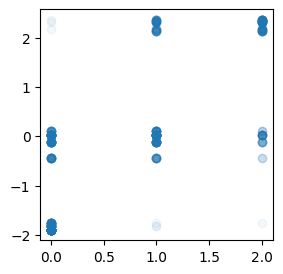

In [15]:
from scipy.stats import pearsonr
X1 = X_low[:size, 0]
feature = X1
labels=df[:size]["satisfaction"]
pearson, _ = pearsonr(feature, labels)
print('pearson =', pearson)

import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.scatter(labels, feature, alpha=0.05)
plt.show()

pearson = 0.03564670495736154


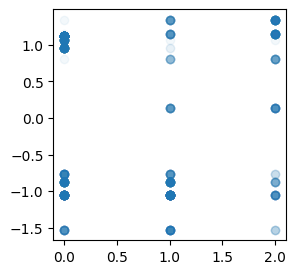

In [16]:
X2 = X_low[:size, 1]
feature = X2
labels=df[:size]["satisfaction"]
pearson, _ = pearsonr(feature, labels)
print('pearson =', pearson)

import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.scatter(labels, feature, alpha=0.05)
plt.show()

In [17]:
df['nstatus_text'] = X_low[:, 0] 

In [18]:
df['nsmartphone_usage'] = df['community']+df['youtube']+df['sns']

In [20]:
to_remove = ['id', 'age', 'gender', 'smartphone_usage',
             'sleeping_hour', 'status_text', 'satisfaction', 'status',
             'community', 'youtube', 'sns', 'ngender',
            ]

#X_status = pd.get_dummies(df["status"], prefix="status")   # 'color_blue', ‚Ä¶ Ïó¥ ÏÉùÏÑ±
X_other = df[df.columns.drop(to_remove)]                                   # Ïó∞ÏÜçÌòï ÌîºÏ≤ò ÏòàÏãú
#X       = pd.concat([X_status, X_other], axis=1)
X       = X_other
X_train = X[:size]
X_test = X[size:]
X_train.head()

nage  nsleeping_hour  nstatus_text  nsmartphone_usage
0    49             5.5     -1.814233                 39
1    46             4.5      0.114806                 74
2    47             4.5     -1.898662                 65
3    32             5.5      0.018903                 39
4    23             4.5      0.018903                 59

In [21]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¥ÎûòÏä§Í∞í ÌôïÏù∏
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: satisfaction, dtype: float64

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∂ÑÏÑù

pearson = -0.7657333043939127


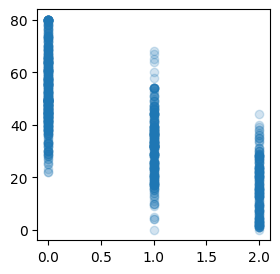

In [22]:
from scipy.stats import pearsonr
labels = y_train
feature = X_train['nsmartphone_usage']

pearson, _ = pearsonr(feature, labels)
print('pearson =', pearson)

import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.scatter(labels, feature, alpha=0.2)
plt.show()

pearson = 0.7296857604649053


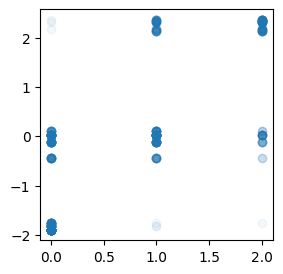

In [23]:
from scipy.stats import pearsonr
labels = y_train
feature = X_train['nstatus_text']

pearson, _ = pearsonr(feature, labels)
print('pearson =', pearson)

import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.scatter(labels, feature, alpha=0.05)
plt.show()

+ Ïó¨Îü¨Í∞ÄÏßÄ Î®∏Ïã†Îü¨Îãù Î™®Îç∏Î°ú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ ÍµêÏ∞®Í≤ÄÏ¶ùÏùÑ ÏàòÌñâÌïòÎ©∞ ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ Í≤ÉÏùÑ Ï∞æÎäîÎã§

In [24]:
from random import Random
from xgboost import XGBClassifier
from sklearn.preprocessing   import StandardScaler
from sklearn.neural_network  import MLPClassifier
from sklearn.pipeline        import Pipeline
from sklearn.pipeline import make_pipeline

# ÌïÑÏöîÌïú Î®∏Ïã†Îü¨Îãù Ìï®Ïàò ÌòπÏùÄ ÌïòÏù¥ÌçºÌå®Îü¨ÎØ∏ÌÑ∞Î•º Ï∂îÍ∞ÄÌïòÍ±∞ÎÇò Î∂àÌïÑÏöîÌïú Ìï®ÏàòÎ•º ÏÇ≠Ï†úÌïòÎäî Îì± ÏûêÏú†Î°≠Í≤å ÏàòÏ†ïÌïòÏÑ∏Ïöî
dt = DecisionTreeClassifier(criterion='gini', max_depth=6, max_features=None,
                                                     min_samples_leaf=2, min_samples_split=2, random_state=1)
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                                             learning_rate=0.1,
                                             n_estimators=200, random_state=1)
rf = RandomForestClassifier(bootstrap=False, max_depth=10, max_features=0.6, 
                          min_samples_leaf=2,
                          n_estimators=800, random_state=1)

mlp = make_pipeline( StandardScaler(),
                     MLPClassifier(hidden_layer_sizes=(16, 8),
                                      activation="relu",
                                      max_iter=2000,
                                      random_state=42,
                                      solver="adam",
                                      alpha=1e-8,
                                      learning_rate_init=0.0005,
                                      batch_size=4,
                     )
       )
                    
xgb =  XGBClassifier(
                    objective    = "binary:logistic",
                    eval_metric  = "logloss",
                    tree_method  = "hist",
                    random_state = 1,
                    n_jobs       = -1,
                    colsample_bytree =  0.8,
                    gamma =  1,
                    learning_rate= 0.01,
                    max_depth = 7, 
                    n_estimators = 800, 
                    subsample =  1.0 )

estimator1 = [("dt",dt),("rf",rf),("ada",ada),("mlp", mlp),("xgb", xgb)]
vt=VotingClassifier(estimators=estimator1, voting="hard")
#estimator2 = [("rf",rf),("vt",vt)]
estimator2 = [("dt",dt),("rf",rf),("ada",ada),("mlp", mlp),("xgb", xgb)]

classifiers = {"DecisionTree":DecisionTreeClassifier(criterion='gini', max_depth=6, max_features=None,
                                                     min_samples_leaf=2, min_samples_split=2, random_state=1),
               "AdaBoost":AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                                             learning_rate=0.1,
                                             n_estimators=200, random_state=1),
               "RandomForest": RandomForestClassifier(bootstrap=False, max_depth=10, max_features=0.6, 
                                                      min_samples_leaf=2,
                                                      n_estimators=800, random_state=1),
               "XGBoost": XGBClassifier(
                    objective    = "binary:logistic",
                    eval_metric  = "logloss",
                    tree_method  = "hist",
                    random_state = 1,
                    n_jobs       = -1,
                    colsample_bytree =  0.8,
                    gamma =  1,
                    learning_rate= 0.01,
                    max_depth = 7, 
                    n_estimators = 800, 
                    subsample =  1.0,
                ),
               "MLP": make_pipeline(
                    StandardScaler(),
                    MLPClassifier(hidden_layer_sizes=(16, 8),
                                  activation="relu",
                                  max_iter=2000,
                                  random_state=42,
                                  solver="adam",
                                  alpha=1e-8,
                                  learning_rate_init=0.0005,
                                  batch_size=4,
                                 )
                ),
               "Voting": VotingClassifier(estimators=estimator1, voting="hard"),
               "Stacking":StackingClassifier(estimators=estimator2)
               }

# clfsÏóê ÎÇòÏó¥Îêú Ìï≠Î™©Ïóê ÎåÄÌï¥ Ï∞®Î°ÄÎ°ú ÍµêÏ∞®Í≤ÄÏ¶ù ÏàòÌñâ
for name, clf in classifiers.items():
    print(name, cross_val_score(clf, X_train, y_train).mean().round(4))

DecisionTree 0.926
AdaBoost 0.923
RandomForest 0.922
XGBoost 0.925
MLP 0.927
Voting 0.93
Stacking 0.931


# ÌäπÏßï(feature) Ï§ëÏöîÎèÑ Î∂ÑÏÑù

In [25]:
from sklearn.inspection import permutation_importance
rf = RandomForestClassifier(bootstrap=False, max_depth=10, max_features=0.6, 
                          min_samples_leaf=2,
                          n_estimators=800, random_state=1)
rf.fit(X_train, y_train)
dt = DecisionTreeClassifier(criterion='gini', max_depth=6, max_features=None,
                                                     min_samples_leaf=2, min_samples_split=2, random_state=1)
dt.fit(X_train, y_train)


feature_names = X_train.columns
imp_rf = pd.Series(rf.feature_importances_, index=feature_names)
imp_dt = pd.Series(dt.feature_importances_, index=feature_names)
perm_rf = permutation_importance(rf, X_train, y_train, n_repeats=15,
                                 scoring="accuracy", random_state=0, n_jobs=-1)
perm_dt = permutation_importance(dt, X_train, y_train, n_repeats=15,
                                 scoring="accuracy", random_state=0, n_jobs=-1)
perm_rf_imp = pd.Series(perm_rf.importances_mean, index=feature_names)
perm_dt_imp = pd.Series(perm_dt.importances_mean, index=feature_names)


Random Forest ‚Äì Gini Ï§ëÏöîÎèÑ TOP10
nsmartphone_usage    0.376435
nstatus_text         0.350574
nsleeping_hour       0.233576
nage                 0.039414
dtype: float64

Random Forest ‚Äì Permutation Ï§ëÏöîÎèÑ TOP10
nstatus_text         0.323600
nsmartphone_usage    0.315600
nsleeping_hour       0.170867
nage                 0.031200
dtype: float64


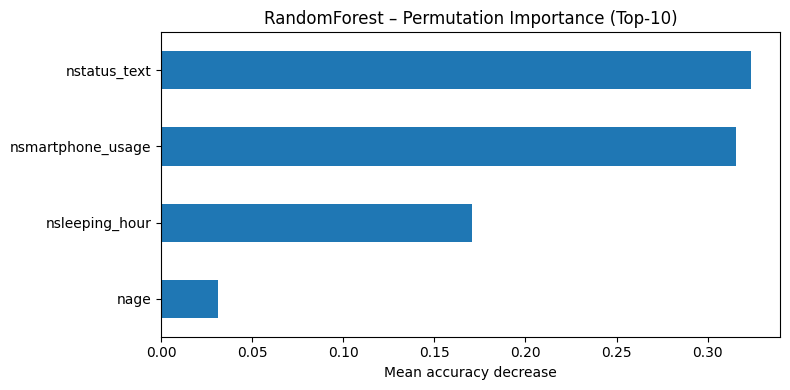

In [26]:
print("\nRandom Forest ‚Äì Gini Ï§ëÏöîÎèÑ TOP10")
print(imp_rf.sort_values(ascending=False).head(10))
print("\nRandom Forest ‚Äì Permutation Ï§ëÏöîÎèÑ TOP10")
print(perm_rf_imp.sort_values(ascending=False).head(10))
# 7. ÏãúÍ∞ÅÌôî (Random Forest Permutation Í∏∞Ï§Ä ÏÉÅÏúÑ 10Í∞ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ)
top10 = perm_rf_imp.sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 4))
top10[::-1].plot(kind="barh")          # Ïó≠ÏàúÏúºÎ°ú Í∑∏Î†§ Í∞ÄÎ°ú ÎßâÎåÄ
plt.title("RandomForest ‚Äì Permutation Importance (Top-10)")
plt.xlabel("Mean accuracy decrease")
plt.tight_layout()
plt.show()


Decision Tree ‚Äì Gini Ï§ëÏöîÎèÑ TOP10
nsmartphone_usage    0.498379
nstatus_text         0.388954
nsleeping_hour       0.104525
nage                 0.008142
dtype: float64

Decision Tree ‚Äì Permutation Ï§ëÏöîÎèÑ TOP10
nsmartphone_usage    0.297933
nstatus_text         0.288400
nsleeping_hour       0.186933
nage                 0.004133
dtype: float64


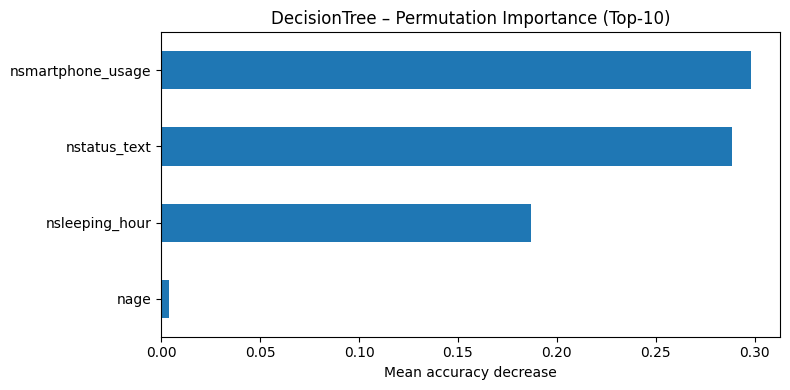

In [27]:
print("\nDecision Tree ‚Äì Gini Ï§ëÏöîÎèÑ TOP10")
print(imp_dt.sort_values(ascending=False).head(10))
print("\nDecision Tree ‚Äì Permutation Ï§ëÏöîÎèÑ TOP10")
print(perm_dt_imp.sort_values(ascending=False).head(10))
# 7. ÏãúÍ∞ÅÌôî (Random Forest Permutation Í∏∞Ï§Ä ÏÉÅÏúÑ 10Í∞ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ)
top10 = perm_dt_imp.sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 4))
top10[::-1].plot(kind="barh")          # Ïó≠ÏàúÏúºÎ°ú Í∑∏Î†§ Í∞ÄÎ°ú ÎßâÎåÄ
plt.title("DecisionTree ‚Äì Permutation Importance (Top-10)")
plt.xlabel("Mean accuracy decrease")
plt.tight_layout()
plt.show()

# ÏµúÏ†ÅÌôî parameter ÌÉêÏÉâ

In [28]:
# ------------------------------------------------------------------
param_grid = {
    "n_estimators":    [800, 1600],
    "max_depth":       [None, 10, 20, 30],
    "min_samples_leaf":[1, 2, 4],
    "max_features":    ["sqrt", 0.6, 1.0],   # Î∂ÑÎ•ò Í∏∞Î≥∏ 'sqrt'
    "bootstrap":       [True, False]
}

rf      = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_cv = GridSearchCV(
    estimator  = rf,
    param_grid = param_grid,
    cv         = 5,
    scoring    = "accuracy",
    n_jobs     = -1,
    verbose    = 1
)
grid_cv.fit(X_train, y_train)

print("üîé GridSearch ÏµúÍ≥† ÌååÎùºÎØ∏ÌÑ∞")
print(grid_cv.best_params_)
print(f"CV AUC = {grid_cv.best_score_:.4f}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits


KeyboardInterrupt: 

In [ ]:
param_grid = {
    #"model__n_estimators":    [200, 400, 800],
    "model__n_estimators":    [1600, 2000],
    #"model__max_depth":       [None, 10, 20, 30],
    "model__max_depth":       [None, 30],
    #"model__min_samples_leaf":[1, 2, 4],
    "model__min_samples_leaf":[1, 2],
    #"model__max_features":    ["sqrt", 0.6, 1.0],   # Î∂ÑÎ•ò Í∏∞Î≥∏ 'sqrt'
    "model__max_features":    ["sqrt"],   # Î∂ÑÎ•ò Í∏∞Î≥∏ 'sqrt'
    "model__bootstrap":       [True, False]
}
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"   # ÎùºÎ≤® Î∂àÍ∑†Ìòï ÏôÑÌôî
)

clf = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", rf)
])

grid_cv = GridSearchCV(
    estimator  = clf,
    param_grid = param_grid,
    cv         = 5,
    scoring    = "accuracy",
    n_jobs     = -1,
    verbose    = 1
)
grid_cv.fit(X_known, y_known)
print("üîé GridSearch ÏµúÍ≥† ÌååÎùºÎØ∏ÌÑ∞")
print(grid_cv.best_params_)
print(f"CV AUC = {grid_cv.best_score_:.4f}")

In [ ]:
# ------------------------------------------------------------------
# 1) Í∑∏Î¶¨Îìú Ï†ïÏùò
# ------------------------------------------------------------------
param_grid = {
    "criterion":         ["gini", "entropy", "log_loss"],
    "max_depth":         [None, 4, 6, 8, 12],
    "min_samples_split": [2, 4, 8, 16],
    "min_samples_leaf":  [1, 2, 4],
    "max_features":      [None, "sqrt", "log2"]
}

# ------------------------------------------------------------------
# 2) GridSearchCV ÏÑ§Ï†ï & ÌïôÏäµ
# ------------------------------------------------------------------
dt     = DecisionTreeClassifier(random_state=42)
grid   = GridSearchCV(
    estimator   = dt,
    param_grid  = param_grid,
    cv          = 5,               # 5-fold ÍµêÏ∞®Í≤ÄÏ¶ù
    scoring     = "accuracy",      # ÌïÑÏöî Ïãú 'roc_auc_ovo', 'f1_macro' Îì± ÍµêÏ≤¥
    n_jobs      = -1,
    verbose     = 1
)
grid.fit(X_train, y_train)

# ------------------------------------------------------------------
# 3) Í≤∞Í≥º ÌôïÏù∏
# ------------------------------------------------------------------
print("\nüìå ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞")
for k, v in grid.best_params_.items():
    print(f"  {k:18s}: {v}")

print(f"\nCV ÏµúÍ≥† Ï†ïÌôïÎèÑ  : {grid.best_score_:.4f}")

In [67]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# 2) Í∏∞Î≥∏ ÏïΩÌïú ÌïôÏäµÍ∏∞(Í≤∞Ï†ïÌä∏Î¶¨) ÏÑ§Ï†ï -------------------------------
weak_tree = DecisionTreeClassifier(
    max_depth=1,                # Ïä§ÌÖÄÌîÑ
    random_state=42
)

# 3-A) Grid Search -----------------------------------------------
param_grid = {
    "n_estimators": [50, 100, 200, 400],
    "learning_rate": [0.05, 0.1, 0.2, 0.5, 1.0],
    "estimator__max_depth": [1, 2, 3]   # base_estimator ‚Üí estimator
}

ada = AdaBoostClassifier(
    estimator=weak_tree,      # ‚Üê Ïó¨Í∏∞!
    n_estimators=400,
    learning_rate=0.1,
    random_state=42
)
grid = GridSearchCV(
    ada,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("\nüìå GridSearch ÏµúÍ≥† ÌååÎùºÎØ∏ÌÑ∞:")
print(grid.best_params_)
print(f"CV Ï†ïÌôïÎèÑ: {grid.best_score_:.4f}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits

üìå GridSearch ÏµúÍ≥† ÌååÎùºÎØ∏ÌÑ∞:
{'estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}
CV Ï†ïÌôïÎèÑ: 0.9230


In [86]:
from sklearn.svm             import SVC
from sklearn.datasets        import load_wine          # Îã§Ï§ë ÌÅ¥ÎûòÏä§ ÏòàÏãú
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV,
                                     StratifiedKFold)
from sklearn.metrics         import (classification_report,
                                     accuracy_score)

# 1) Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# 2) SVC Í∏∞Î≥∏ ÏÑ§Ï†ï ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
#    - probability=True : predict_proba ÏÇ¨Ïö©(ÏõêÌïúÎã§Î©¥ FalseÎ°ú)
svc_base = SVC(probability=True, random_state=42)

# 3) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
param_grid = [
    # (1) RBF Ïª§ÎÑê
    {
        "kernel": ["rbf"],
        "C":      [0.1, 1, 10, 100],
        "gamma":  ["scale", 0.01, 0.1, 1]
    },
    # (2) ÏÑ†Ìòï Ïª§ÎÑê
    {
        "kernel": ["linear"],
        "C":      [0.1, 1, 10, 100]
    },
    # (3) Îã§Ìï≠ Ïª§ÎÑê
    {
        "kernel": ["poly"],
        "C":      [0.1, 1, 10],
        "gamma":  ["scale", 0.1],
        "degree": [2, 3, 4],
        "coef0":  [0]                # bias term
    }
]

# 4) GridSearchCV ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator   = svc_base,
    param_grid  = param_grid,
    scoring     = "accuracy",          # ÏõêÌïòÎäî ÏßÄÌëúÎ°ú ÍµêÏ≤¥ Í∞ÄÎä•
    cv          = cv,
    n_jobs      = -1,
    verbose     = 1
)
grid.fit(X_train, y_train)

print("\nüîé ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞")
for k, v in grid.best_params_.items():
    print(f"  {k:<8}: {v}")
print(f"CV ÏµúÍ≥† Ï†ïÌôïÎèÑ : {grid.best_score_:.4f}")


Fitting 5 folds for each of 38 candidates, totalling 190 fits

üîé ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
  C       : 0.1
  kernel  : linear
CV ÏµúÍ≥† Ï†ïÌôïÎèÑ : 0.8840


In [85]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer      # Ïù¥ÏßÑ Î∂ÑÎ•ò ÏòàÏãú
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2. Í∑∏Î¶¨Îìú Ï†ïÏùò
#    - Î≤îÏúÑÎ•º Ï¢ÅÌòÄÏÑú Ï¥òÏ¥òÌûà Ï∞æÍ≥† Ïã∂ÏùÑ Îïê Í∞í Í∞úÏàòÎ•º Ï§ÑÏù¥Í±∞ÎÇò
#      RandomizedSearchCVÏôÄ Î≥ëÌñâÌï¥ÎèÑ Ï¢ãÏäµÎãàÎã§.
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2) Í∏∞Î≥∏ Î™®Îç∏
base_xgb = XGBClassifier(
    objective    = "binary:logistic",
    eval_metric  = "logloss",
    tree_method  = "hist",
    random_state = 42,
    n_jobs       = -1
)

# 3) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
param_grid = {
    "n_estimators":      [200, 400, 800],
    "learning_rate":     [0.01, 0.05, 0.1],
    "max_depth":         [3, 5, 7],
    "subsample":         [0.8, 1.0],
    "colsample_bytree":  [0.8, 1.0],
    "gamma":             [0, 1, 5]
}

# 4) GridSearchCV (accuracy Í∏∞Ï§Ä)
grid = GridSearchCV(
    estimator   = base_xgb,
    param_grid  = param_grid,
    scoring     = "accuracy",        # ‚òÖ Î≥ÄÍ≤Ω
    cv          = 5,
    n_jobs      = -1,
    verbose     = 1
)
grid.fit(X_train, y_train)

print("\nüîé ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞:", grid.best_params_)
print(f"CV ÏµúÍ≥† Ï†ïÌôïÎèÑ  : {grid.best_score_:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits

üîé ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 800, 'subsample': 1.0}
CV ÏµúÍ≥† Ï†ïÌôïÎèÑ  : 0.9230


In [48]:
from sklearn.preprocessing   import StandardScaler
from sklearn.neural_network  import MLPClassifier
from sklearn.pipeline        import Pipeline
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1) ÌååÏù¥ÌîÑÎùºÏù∏ (ÌëúÏ§ÄÌôî ‚Üí MLP)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("mlp",   MLPClassifier(
        activation="relu",
        max_iter=2000,
        solver="adam",
        random_state=42,
        #early_stopping=True,
        validation_fraction=0.2,
        #n_iter_no_change=10,
    ))
])

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2) ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
#    - hidden_layer_sizes: Ï∏µ Í∞úÏàò¬∑ÎÖ∏Îìú Ïàò Ï°∞Ìï©
#    - alpha             : L2 Ï†ïÍ∑úÌôî
#    - learning_rate_init: Ï¥àÍ∏∞ ÌïôÏäµÎ•†
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
param_grid = {
    #"mlp__hidden_layer_sizes": [(32,), (32,16)],
    "mlp__hidden_layer_sizes": [(32,8),(16,8)],
    #"mlp__alpha":              [1e-5, 1e-4, 1e-3],
    "mlp__alpha":              [1e-8],
    #"mlp__learning_rate_init": [0.001, 0.01],
    "mlp__learning_rate_init": [0.0005],
    "mlp__batch_size":         [2, 4]
}

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 3) GridSearchCV
#    - 5-fold Stratified CV, Ï†ïÌôïÎèÑ Í∏∞Ï§Ä
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
grid = GridSearchCV(
    estimator = pipe,
    param_grid= param_grid,
    scoring   = "accuracy",
    cv        = 5,
    n_jobs    = -1,
    verbose   = 1
)
grid.fit(X_train, y_train)

print("\nüîé ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞")
for k, v in grid.best_params_.items():
    print(f"  {k:25s}: {v}")
print(f"CV ÏµúÍ≥† Ï†ïÌôïÎèÑ   : {grid.best_score_:.4f}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits

üîé ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
  mlp__alpha               : 1e-08
  mlp__batch_size          : 4
  mlp__hidden_layer_sizes  : (16, 8)
  mlp__learning_rate_init  : 0.0005
CV ÏµúÍ≥† Ï†ïÌôïÎèÑ   : 0.9220


+ Í∞ÄÏû• Í≤∞Í≥ºÍ∞Ä Ïûò ÎÇòÏò§Îäî Î™®Îç∏ÏùÑ ÌîºÌåÖÌïòÏó¨ result Î≥ÄÏàòÏóê ÎÑ£Í≥† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÏûÖÎ†•ÌïòÏó¨ ÏòàÏ∏° Í≤∞Í≥ºÎ•º y_predÏóê ÏÉùÏÑ±ÌïúÎã§

In [29]:
# Îã§ÏùåÏùÄ ÏòàÏãú Î™®Îç∏ÏûÖÎãàÎã§. ÏûêÏã†Ïùò Î∂ÑÎ•òÎ™®Îç∏Í≥º Ìå®Îü¨ÎØ∏ÌÑ∞Î°ú ÏàòÏ†ïÌïòÏÑ∏Ïöî
#result = VotingClassifier(estimators=estimator1, voting='hard').fit(X_train, y_train) # ÍµêÏ≤¥Ìï† Í≤É
result =  StackingClassifier(estimators=estimator2).fit(X_train, y_train) # ÍµêÏ≤¥Ìï† Í≤É

y_pred = result.predict(X_test).astype(int) # ÏôÑÏÑ±Îêú ÏΩîÎìú

print(y_pred[:10]) # ÏßÄÎ©¥ÏÉÅ Ï≤´ 10Í∞úÎßå Ï∂úÎ†•

[1 1 1 0 0 1 1 1 0 2]


In [30]:
y_train_pred = result.predict(X_train).astype('int')
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, y_train_pred)
acc

0.954

In [ ]:
0.868, 0.894

# **Submission**
+ 1) ÏïÑÎûò ÏÖÄÏùÑ Ïã§ÌñâÌïòÏó¨ ÏÉùÏÑ±Îêú ÌååÏùºÏùÑ Îã§Ïö¥Î°úÎìú ÌïòÏó¨ Ï∫êÍ∏ÄÏóê Ï†úÏ∂ú
  + ÏΩîÎìúÏóêÏÑú filenameÏùÑ ÌïôÎ≤àÏúºÎ°ú Î≥ÄÍ≤Ω
  + Ï∫êÍ∏ÄÏùò Team NameÏùÑ ÌïôÎ≤àÏùò ÎßàÏßÄÎßâ 4ÏûêÎ¶¨Î°ú Î≥ÄÍ≤Ω(ÎØ∏Î≥ÄÍ≤ΩÏãú ÎØ∏Ï†úÏ∂úÏ≤òÎ¶¨)
+ 2) Î≥∏ ÎÖ∏Ìä∏Î∂Å ÌååÏùºÏùÑ Í≥ºÏ†ú ÏÇ¨Ïù¥Ìä∏Ïùò 15Ï£ºÏ∞®Ïóê Ï†úÏ∂ú(Í∏∞Ìïú Ïù¥ÌõÑ Ï†úÏ∂úÏãú Í∞êÏ†ê)
+ 3) ÏïÑÎûò Ï∂úÎ†•ÎêòÎäî ÎßÅÌÅ¨ÏóêÏÑú Î∞òÎìúÏãú Ï†úÏ∂ú Í∏∞Ìïú, Ï±ÑÏ†ê Í∏∞Ï§Ä Îì±ÏùÑ ÌôïÏù∏

In [31]:
submit_form = pd.read_csv("submit_form.csv") # ÎãµÏïà ÏñëÏãùÏùÑ Î∂àÎü¨Ïò®Îã§.
submit_form["satisfaction"] = y_pred # Ïù¥Ï†Ñ ÏÖÄÏóêÏÑú ÏÉùÏÑ±Ìïú ÎãµÏïàÏùÑ ÏûÖÎ†•

# XÎ∂ÄÎ∂ÑÏùò ÌïôÎ≤àÏùÑ Ï†ïÌôïÌûà ÏûëÏÑ± (Ï∂îÍ∞Ä Ï†ïÎ≥¥Îäî _Î°ú Î∂ôÏùº Ïàò ÏûàÏäµÎãàÎã§)
# Ïòà) "2025112345_SVC_ver1.0"
filename = "2025122028_Stacking_v5"

# Ï∫êÍ∏ÄÏóê Ï†úÏ∂úÌï† ÌååÏùº ÏÉùÏÑ±(ÏôºÏ™Ω ÎìúÎùºÏù¥Î∏å Ìè¥ÎçîÏóêÏÑú Îã§Ïö¥Î°úÎìú ÌïòÏó¨ Ï†úÏ∂ú)
submit_form.to_csv(f"{filename}.csv", index=False)

# Ï∂úÎ†•Îêú ÎßÅÌÅ¨Î•º ÌÅ¥Î¶≠ÌïòÏó¨ Ï†úÏ∂ú Î∞©Î≤ï Îì± ÌôïÏù∏
print('Í≥ºÏ†ú Ï†úÏ∂úÏùÑ ÏúÑÌï¥ kaggle.comÏóê Í∞ÄÏûÖÌï©ÎãàÎã§(ÌïÑÏàò)')
print("https://www.kaggle.com/t/7789925876b74fd3a0d87bc828711c86")

Í≥ºÏ†ú Ï†úÏ∂úÏùÑ ÏúÑÌï¥ kaggle.comÏóê Í∞ÄÏûÖÌï©ÎãàÎã§(ÌïÑÏàò)
https://www.kaggle.com/t/7789925876b74fd3a0d87bc828711c86


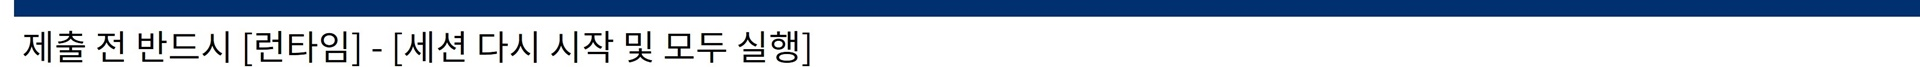

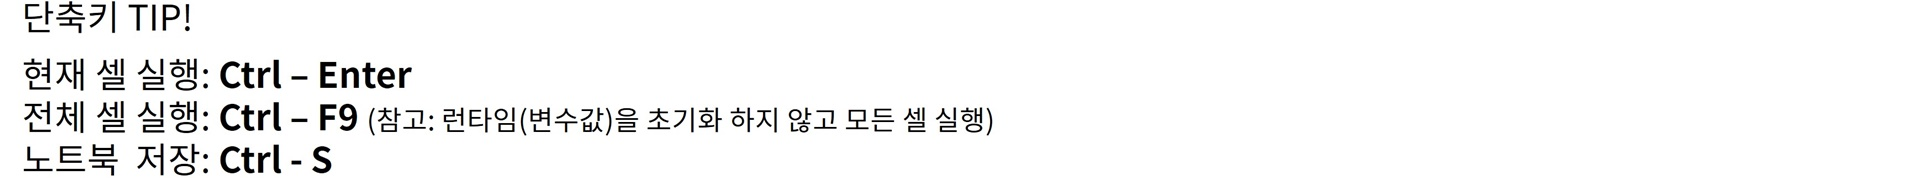